In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import json
import joblib

In [5]:
# Load the CSV file
file_path = 'Crop Production data.csv'
data = pd.read_csv(file_path)

In [7]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [9]:
# Display basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(data.describe())


Basic statistics of the dataset:
           Crop_Year          Area    Production
count  246091.000000  2.460910e+05  2.423610e+05
mean     2005.643018  1.200282e+04  5.825034e+05
std         4.952164  5.052340e+04  1.706581e+07
min      1997.000000  4.000000e-02  0.000000e+00
25%      2002.000000  8.000000e+01  8.800000e+01
50%      2006.000000  5.820000e+02  7.290000e+02
75%      2010.000000  4.392000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09


In [11]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [13]:
# Drop rows with missing values
data.dropna(inplace=True)

In [15]:
# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(data.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB
None


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


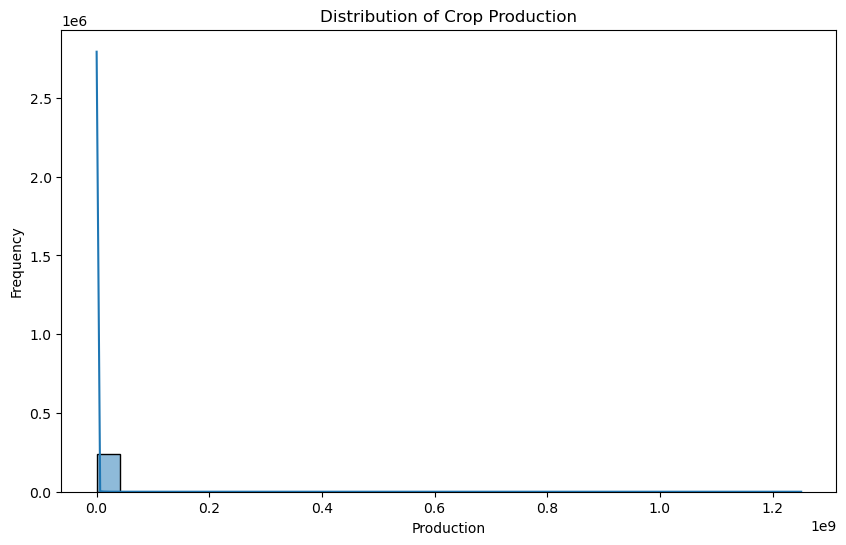

In [17]:
# Exploratory Data Analysis (EDA)

# Visualize the distribution of crop production
plt.figure(figsize=(10, 6))
sns.histplot(data['Production'], kde=True, bins=30)
plt.title('Distribution of Crop Production')
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.show()

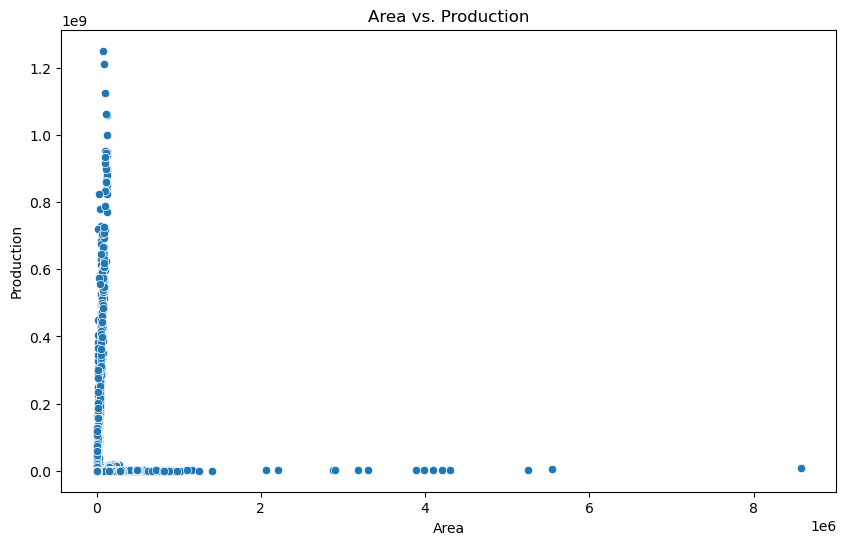

In [19]:
# Visualize the relationship between Area and Production
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Production', data=data)
plt.title('Area vs. Production')
plt.xlabel('Area')
plt.ylabel('Production')
plt.show()

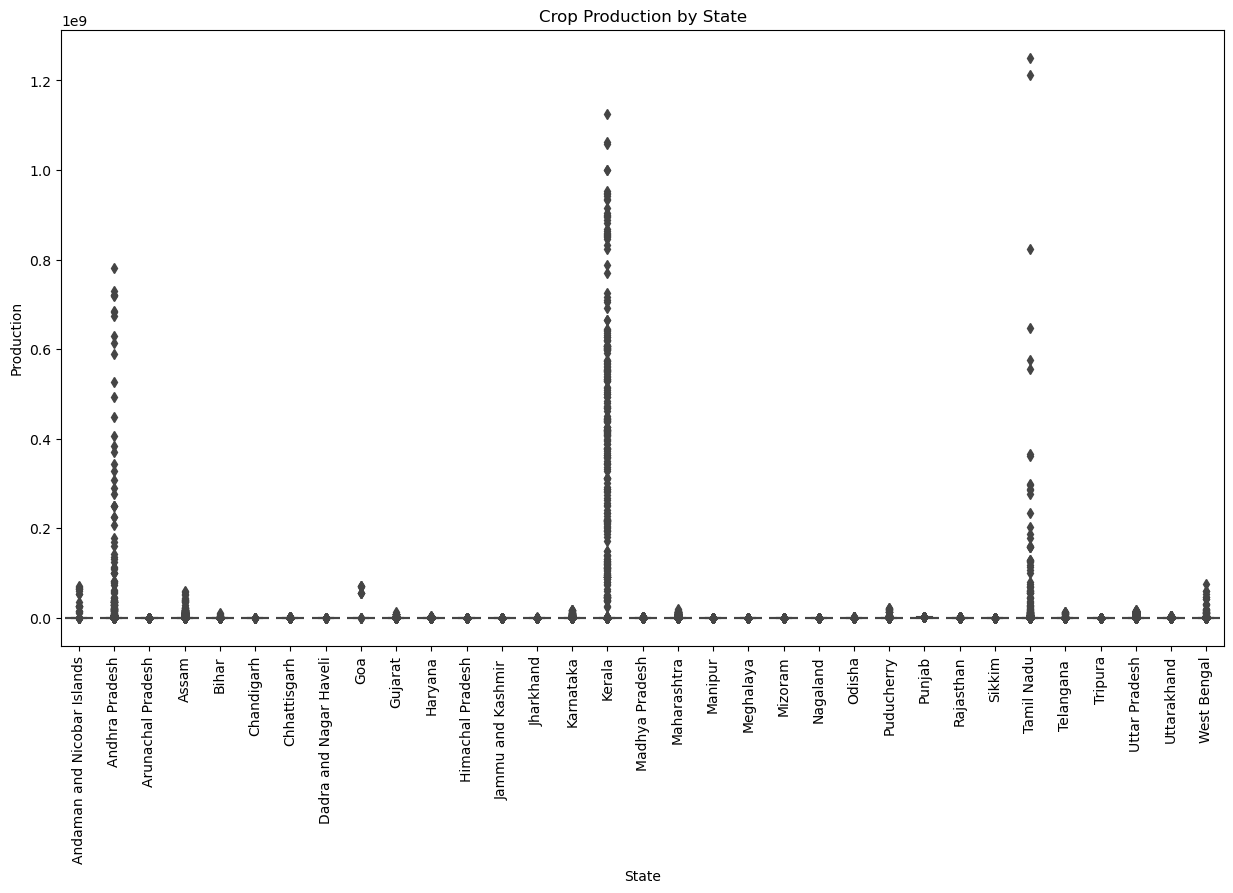

In [21]:
# Visualize crop production by different states
plt.figure(figsize=(15, 8))
sns.boxplot(x='State_Name', y='Production', data=data)
plt.title('Crop Production by State')
plt.xlabel('State')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.show()



In [23]:
# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

In [25]:
# Split the data into features and target variable
X = data_encoded.drop('Production', axis=1)
y = data_encoded['Production']

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Model Building

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [39]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance:\nMean Squared Error: {mse}\nR^2 Score: {r2}")


Model Performance:
Mean Squared Error: 19609067613333.523
R^2 Score: 0.9512621797280586


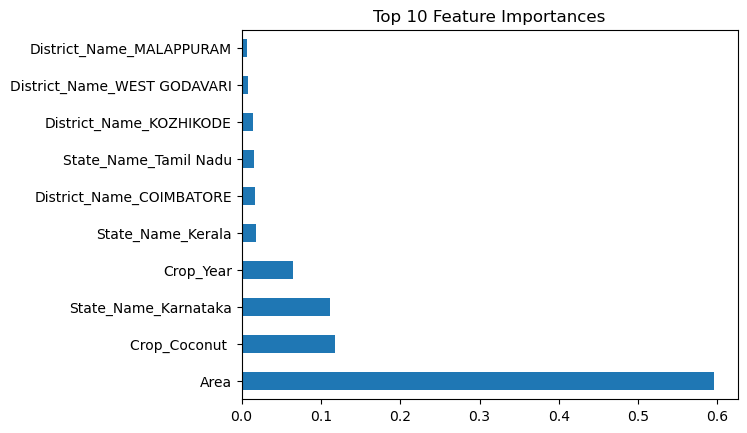

In [41]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

In [43]:
# Summary and Reporting

# Create a summary of key insights
summary = {
    "Basic Statistics": data.describe().to_dict(),
    "Missing Values": data.isnull().sum().to_dict(),
    "Model Performance": {
        "Mean Squared Error": mse,
        "R^2 Score": r2
    },
    "Top 10 Features": feature_importances.nlargest(10).to_dict()
}

print("\nSummary of Key Insights:")
print(summary)


Summary of Key Insights:
{'Basic Statistics': {'Crop_Year': {'count': 242361.0, 'mean': 2005.6257731235637, 'std': 4.958284627246459, 'min': 1997.0, '25%': 2002.0, '50%': 2006.0, '75%': 2010.0, 'max': 2015.0}, 'Area': {'count': 242361.0, 'mean': 12167.414481909218, 'std': 50857.44002417746, 'min': 0.1, '25%': 87.0, '50%': 603.0, '75%': 4545.0, 'max': 8580100.0}, 'Production': {'count': 242361.0, 'mean': 582503.442250981, 'std': 17065813.172410425, 'min': 0.0, '25%': 88.0, '50%': 729.0, '75%': 7023.0, 'max': 1250800000.0}}, 'Missing Values': {'State_Name': 0, 'District_Name': 0, 'Crop_Year': 0, 'Season': 0, 'Crop': 0, 'Area': 0, 'Production': 0}, 'Model Performance': {'Mean Squared Error': 19609067613333.523, 'R^2 Score': 0.9512621797280586}, 'Top 10 Features': {'Area': 0.5955967057862962, 'Crop_Coconut ': 0.11807022952732774, 'State_Name_Karnataka': 0.11187243018960155, 'Crop_Year': 0.06523281457493527, 'State_Name_Kerala': 0.018737629071186982, 'District_Name_COIMBATORE': 0.017325030

In [47]:
# Save the summary to a JSON file
with open('summary.json', 'w') as f:
    json.dump(summary, f, indent=4)

print("\nSummary saved to summary.json")


Summary saved to summary.json


In [51]:
# Save the trained model for future use
joblib.dump(model, 'crop_production_model.pkl')
print("\nTrained model saved to crop_production_model.pkl")


Trained model saved to crop_production_model.pkl
